#HW #2

##GitHub Link: https://github.com/garcimat/EE399

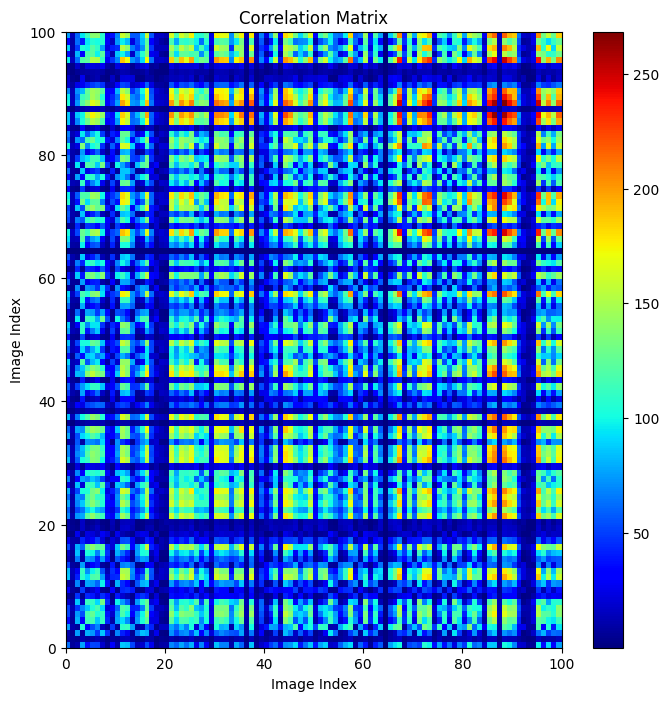

In [2]:
# a)
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# load the data
results = loadmat('yalefaces.mat')
X = results['X']

# compute the correlation matrix
C = np.zeros((100, 100))
for j in range(100):
    for k in range(100):
        C[j, k] = np.dot(X[:, j], X[:, k])

# plot the correlation matrix
plt.figure(figsize=(8, 8))
plt.pcolor(C, cmap='jet')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()


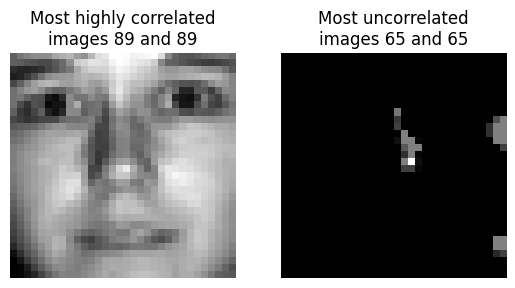

In [6]:
# b)
# Find the indices of the maximum and minimum values in the correlation matrix
max_idx = np.unravel_index(np.argmax(C), C.shape)
min_idx = np.unravel_index(np.argmin(C), C.shape)

# Plot the most highly correlated images
plt.subplot(1,2,1)
plt.imshow(X[:, max_idx[0]].reshape(32,32), cmap='gray')
plt.title(f'Most highly correlated\nimages {max_idx[0]+1} and {max_idx[1]+1}')
plt.axis('off')

plt.subplot(1,2,2)
# Plot the most uncorrelated images
plt.imshow(X[:, min_idx[0]].reshape(32,32), cmap='gray')
plt.title(f'Most uncorrelated\nimages {min_idx[0]+1} and {min_idx[1]+1}')
plt.axis('off')

plt.show()

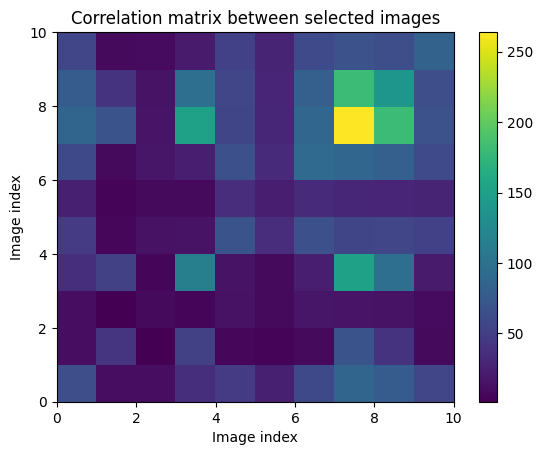

In [7]:
# c)
# Select the columns corresponding to the 10 images of interest
idx = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]
X_subset = X[:, idx]

# Compute the correlation matrix
C = np.dot(X_subset.T, X_subset)

# Plot the correlation matrix using pcolor
plt.pcolor(C)
plt.colorbar()
plt.title('Correlation matrix between selected images')
plt.xlabel('Image index')
plt.ylabel('Image index')
plt.show()

In [16]:
# d)
# Compute the matrix Y = XX^T
Y = np.dot(X, X.T)

# Compute the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)

# Sort the eigenvectors by descending eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

# Print the first six eigenvectors and their eigenvalues
print("First six eigenvectors and their eigenvalues:")
for i in range(6):
    eigenvector = eigenvectors[:, i]
    magnitude = np.abs(eigenvalues[i])
    print("Eigenvector %d: Eigenvalue = %.2f, Magnitude = %.2f" % (i+1, eigenvalues[i], magnitude))
    print(eigenvector)
    print()

First six eigenvectors and their eigenvalues:
Eigenvector 1: Eigenvalue = 234020.45, Magnitude = 234020.45
[0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ]

Eigenvector 2: Eigenvalue = 49038.32, Magnitude = 49038.32
[ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746]

Eigenvector 3: Eigenvalue = 8236.54, Magnitude = 8236.54
[0.05653196 0.04709124 0.0362807  ... 0.06455006 0.06196898 0.05241684]

Eigenvector 4: Eigenvalue = 6024.87, Magnitude = 6024.87
[ 0.04441826  0.05057969  0.05522219 ... -0.01006919 -0.00355905
  0.00040934]

Eigenvector 5: Eigenvalue = 2051.50, Magnitude = 2051.50
[-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412]

Eigenvector 6: Eigenvalue = 1901.08, Magnitude = 1901.08
[0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028]



In [17]:
# e)
# Compute the SVD of X
U, S, Vt = np.linalg.svd(X)

# Find the first six principal component directions
pca_directions = U[:, :6]

print("The first six principal component directions are:")
print(pca_directions)

The first six principal component directions are:
[[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937  0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902   0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019   0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


In [11]:
# f)
# Compute the eigenvectors and eigenvalues of Y
eigenvals, eigenvectors = np.linalg.eigh(Y)

# Find the first eigenvector v1
v1 = eigenvectors[:, -1]

# Find the first SVD mode u1
u1 = U[:, 0]

# Compute the norm of the difference between v1 and u1
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))

print("The norm of the difference between v1 and u1 is:", diff_norm)

The norm of the difference between v1 and u1 is: 7.650346874731423e-16


Percentage of variance captured by each of the first six SVD modes:
Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%


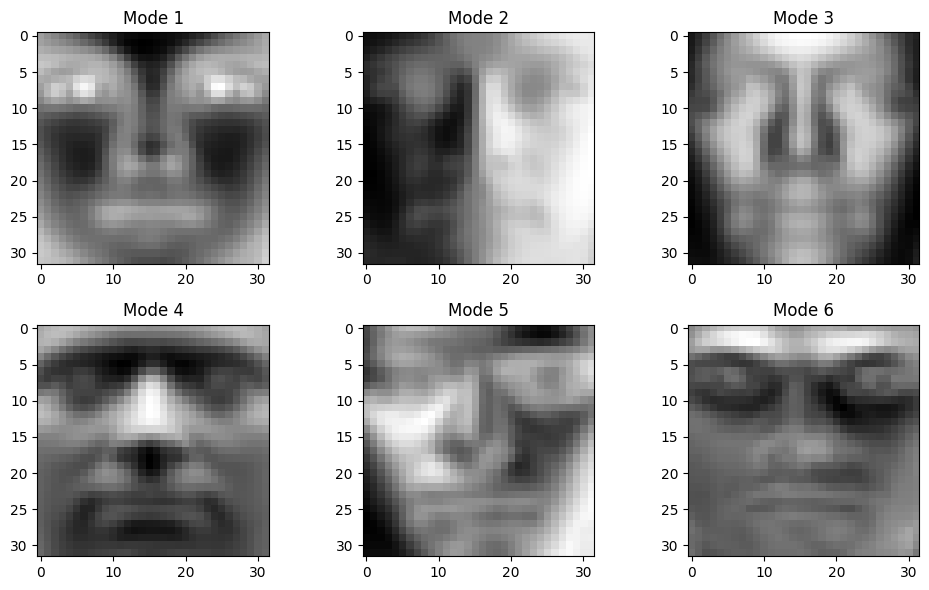

In [12]:
# g)
# Compute the percentage of variance captured by each mode
variance_captured = (S**2 / np.sum(S**2)) * 100

print("Percentage of variance captured by each of the first six SVD modes:")
for i in range(6):
    print("Mode %d: %.2f%%" % (i+1, variance_captured[i]))

# Plot the first six SVD modes
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i in range(6):
    row = i // 3
    col = i % 3
    mode = U[:, i].reshape(32, 32)
    axs[row, col].imshow(mode, cmap='gray')
    axs[row, col].set_title("Mode %d" % (i+1))
plt.tight_layout()
plt.show()